# Veri Analizi & Görselleştirme Alıştırmaları

### 1. Pandas, Matplotlib ve Seaborn kütüphanelerini yükleyin.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Seaborn kütüphanesinden "titanic" verisetini yükleyin.

In [2]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 3. Verisetinde kaç adet satır ve sütun vardır?

In [3]:
titanic.shape

(891, 15)

### 4. Verisetinde eksik veri var mı? Varsa, hangi sütunda en fazla eksik veri var?

In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic.isnull().sum() / len(titanic)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [6]:
bool_series = ((titanic.isnull().sum() / len(titanic)) > 0.20)
bool_series[bool_series==True].keys()[0]

'deck'

### 5. Veri setinden %20'den fazla eksik verisi bulunan sütunu çıkartın (silin).

In [7]:
titanic.drop("deck", axis=1, inplace=True)
# or titanic.drop(bool_series[bool_series==True].keys()[0], axis=1, inplace=True)

In [8]:
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True


### 6. En yüksek ücreti ("fare" sütunu) ödeyen ilk 10 satırı yazdırın.

In [9]:
titanic.sort_values("fare", ascending = False).head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,Cherbourg,yes,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,Southampton,no,False
341,1,1,female,24.0,3,2,263.0000,S,First,woman,False,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,Southampton,no,False
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,Cherbourg,yes,False
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,Cherbourg,yes,False
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,Cherbourg,no,False


### 7. Veri setinde cinsiyet değişkenine göre toplam gözlem sayılarını yazdırınız.

In [10]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

### 8. Yolcuların toplamda yüzde kaçı çocuk veya kadındır?

In [11]:
titanic.who.value_counts(normalize=True).loc["woman"] + titanic.who.value_counts(normalize=True).loc["child"]

0.39730639730639733

### 9. Gemiye "Southampton"dan binen erkek yolcuların yüzde kaçı hayatta kalmıştır?

In [12]:
titanic[(titanic["sex"] == "male") & (titanic["embark_town"] == "Southampton")]["survived"].mean()

0.1746031746031746

### 10. Gemiye "Cherbourg"dan binen kadın yolcuların yüzde kaçı hayatta kalmıştır?

In [13]:
titanic[(titanic["sex"] == "female") & (titanic["embark_town"] == "Cherbourg")]["survived"].mean()

0.8767123287671232

### 11. Yaş değişkeninin dağılımını cinsiyete göre tek bir grafik üzerinde çizdiriniz. Y ekseninde göreceli frekans (density) kullanın. Sınıf sayısını (bins) 8 olarak özelleştirin.

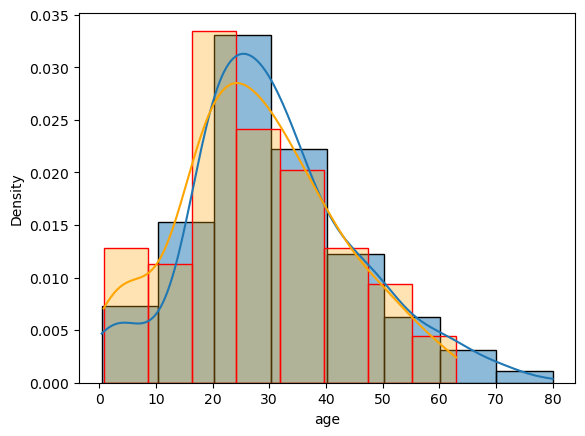

In [14]:
sns.histplot(x="age", data=titanic[titanic["sex"] == "male"], bins=8, stat="density", kde=True);
sns.histplot(x="age", data=titanic[titanic["sex"] == "female"], bins=8, stat="density", color="orange", edgecolor="red", alpha=0.3, kde=True);

### 12. Veri setinde kayıp değerleri uygun yöntemlerle doldurunuz.

In [15]:
titanic['age'] = titanic['age'].fillna((titanic['age'].mean()))

In [16]:
titanic["embark_town"] = titanic["embark_town"].fillna(method = "bfill")

In [17]:
titanic["embarked"] = titanic["embarked"].fillna(method = "bfill")

In [18]:
titanic.isnull().sum() / len(titanic)

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

### 13. Yolcu sınıflarına göre ("class" sütunu) erkek ve kadın sayılarını ayrı ayrı yazdırınız.

In [19]:
titanic.groupby(['sex', 'class'])['sex'].count()

sex     class 
female  First      94
        Second     76
        Third     144
male    First     122
        Second    108
        Third     347
Name: sex, dtype: int64

### 14. Yolcu sınıflarına göre ("class" sütunu) ücretin ("fare" sütunu) dağılımını boxplot ile gösteriniz.

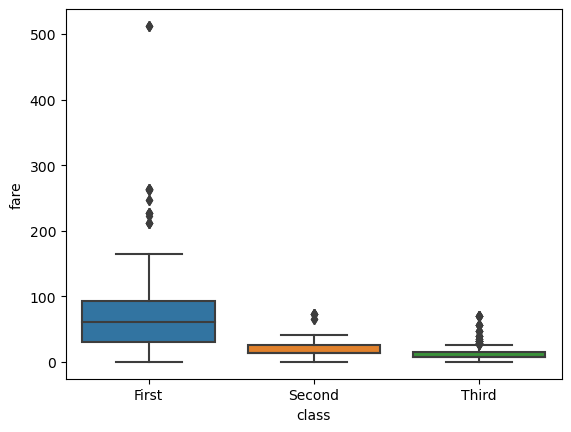

In [20]:
sns.boxplot(x="class", y="fare", data=titanic);

### 15. Gemiye biniş şehri (embark_town) ile sınıf (class) değişkeninden oluşan çapraz tabloyu oluşturunuz.

In [21]:
pd.crosstab(titanic["embark_town"], titanic["class"])

class,First,Second,Third
embark_town,,,
Cherbourg,86,17,66
Queenstown,2,3,72
Southampton,128,164,353


### 16. Seaborn kütüphanesinden "dowjones" verisetini yükleyin ve "1945-01-01" ile "1954-12-01" arasındaki bilgileri getiren dataframe oluşturun.

In [22]:
dowjones = sns.load_dataset("dowjones")
dowjones.set_index("Date", inplace=True)
dowjones.truncate(before = "1945-01-01", after = "1954-12-01")

,Price
Date,
1945-01-01,153.60
1945-02-01,157.10
1945-03-01,156.90
1945-04-01,160.22
1945-05-01,166.08
...,...
1954-08-01,346.06
1954-09-01,352.71
1954-10-01,358.29


### 17. Bu tarihler arasındaki zaman serisini gösteren bir çizgi grafiği (line plot) çizdiriniz.

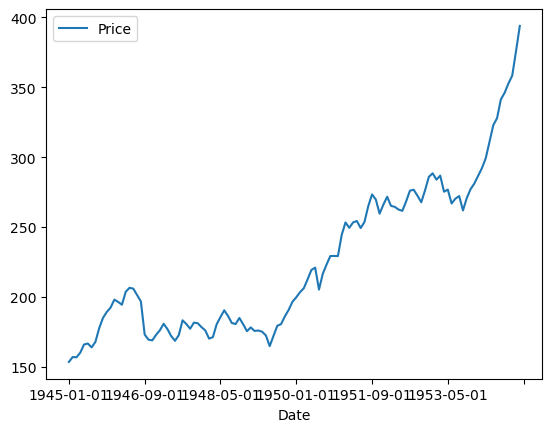

In [23]:
dowjones.truncate(before = "1945-01-01", after = "1954-12-01").plot(y="Price", use_index=True);

In [24]:
dj1 = dowjones.truncate(before = "1945-01-01", after = "1954-12-01")

<AxesSubplot:xlabel='Date', ylabel='Price'>

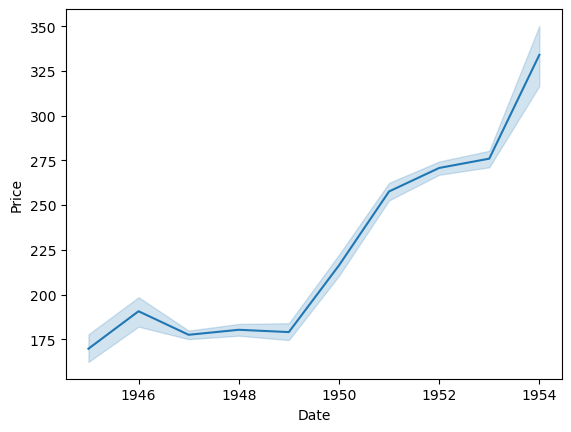

In [25]:
sns.lineplot(x=pd.DatetimeIndex(dj1.index).year, y="Price", data=dj1)

### 18. Seaborn kütüphanesinden "car_crashes" veri setini yükleyiniz. Değişkenler arasındaki korelasyonları gösteriniz. En yüksek korelasyonu çıkaracak olan fonksiyonu yazınız.

In [26]:
crashes = sns.load_dataset("car_crashes")
crashes

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


In [27]:
crashes.corr()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


### 19. "car_crashes" veri setindeki korelasyonları kullanarak ısı grafiği (heatmap) oluşturunuz. 

<AxesSubplot:>

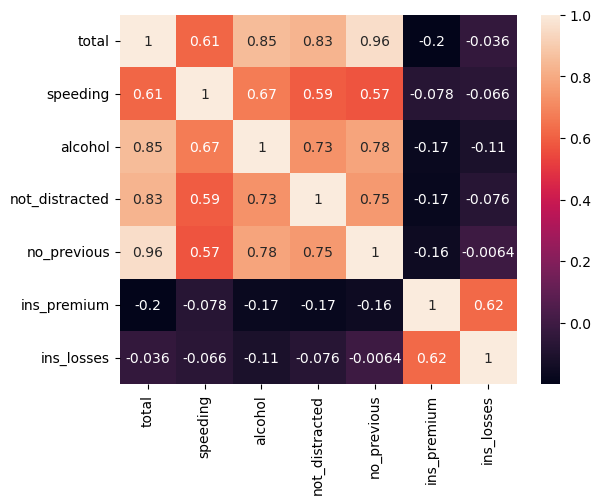

In [33]:
sns.heatmap(crashes.corr(), annot=True)

### 20. "car_crashes" veri setindeki sayısal değişkenleri kullanarak scatterplot matrisi oluşturunuz.

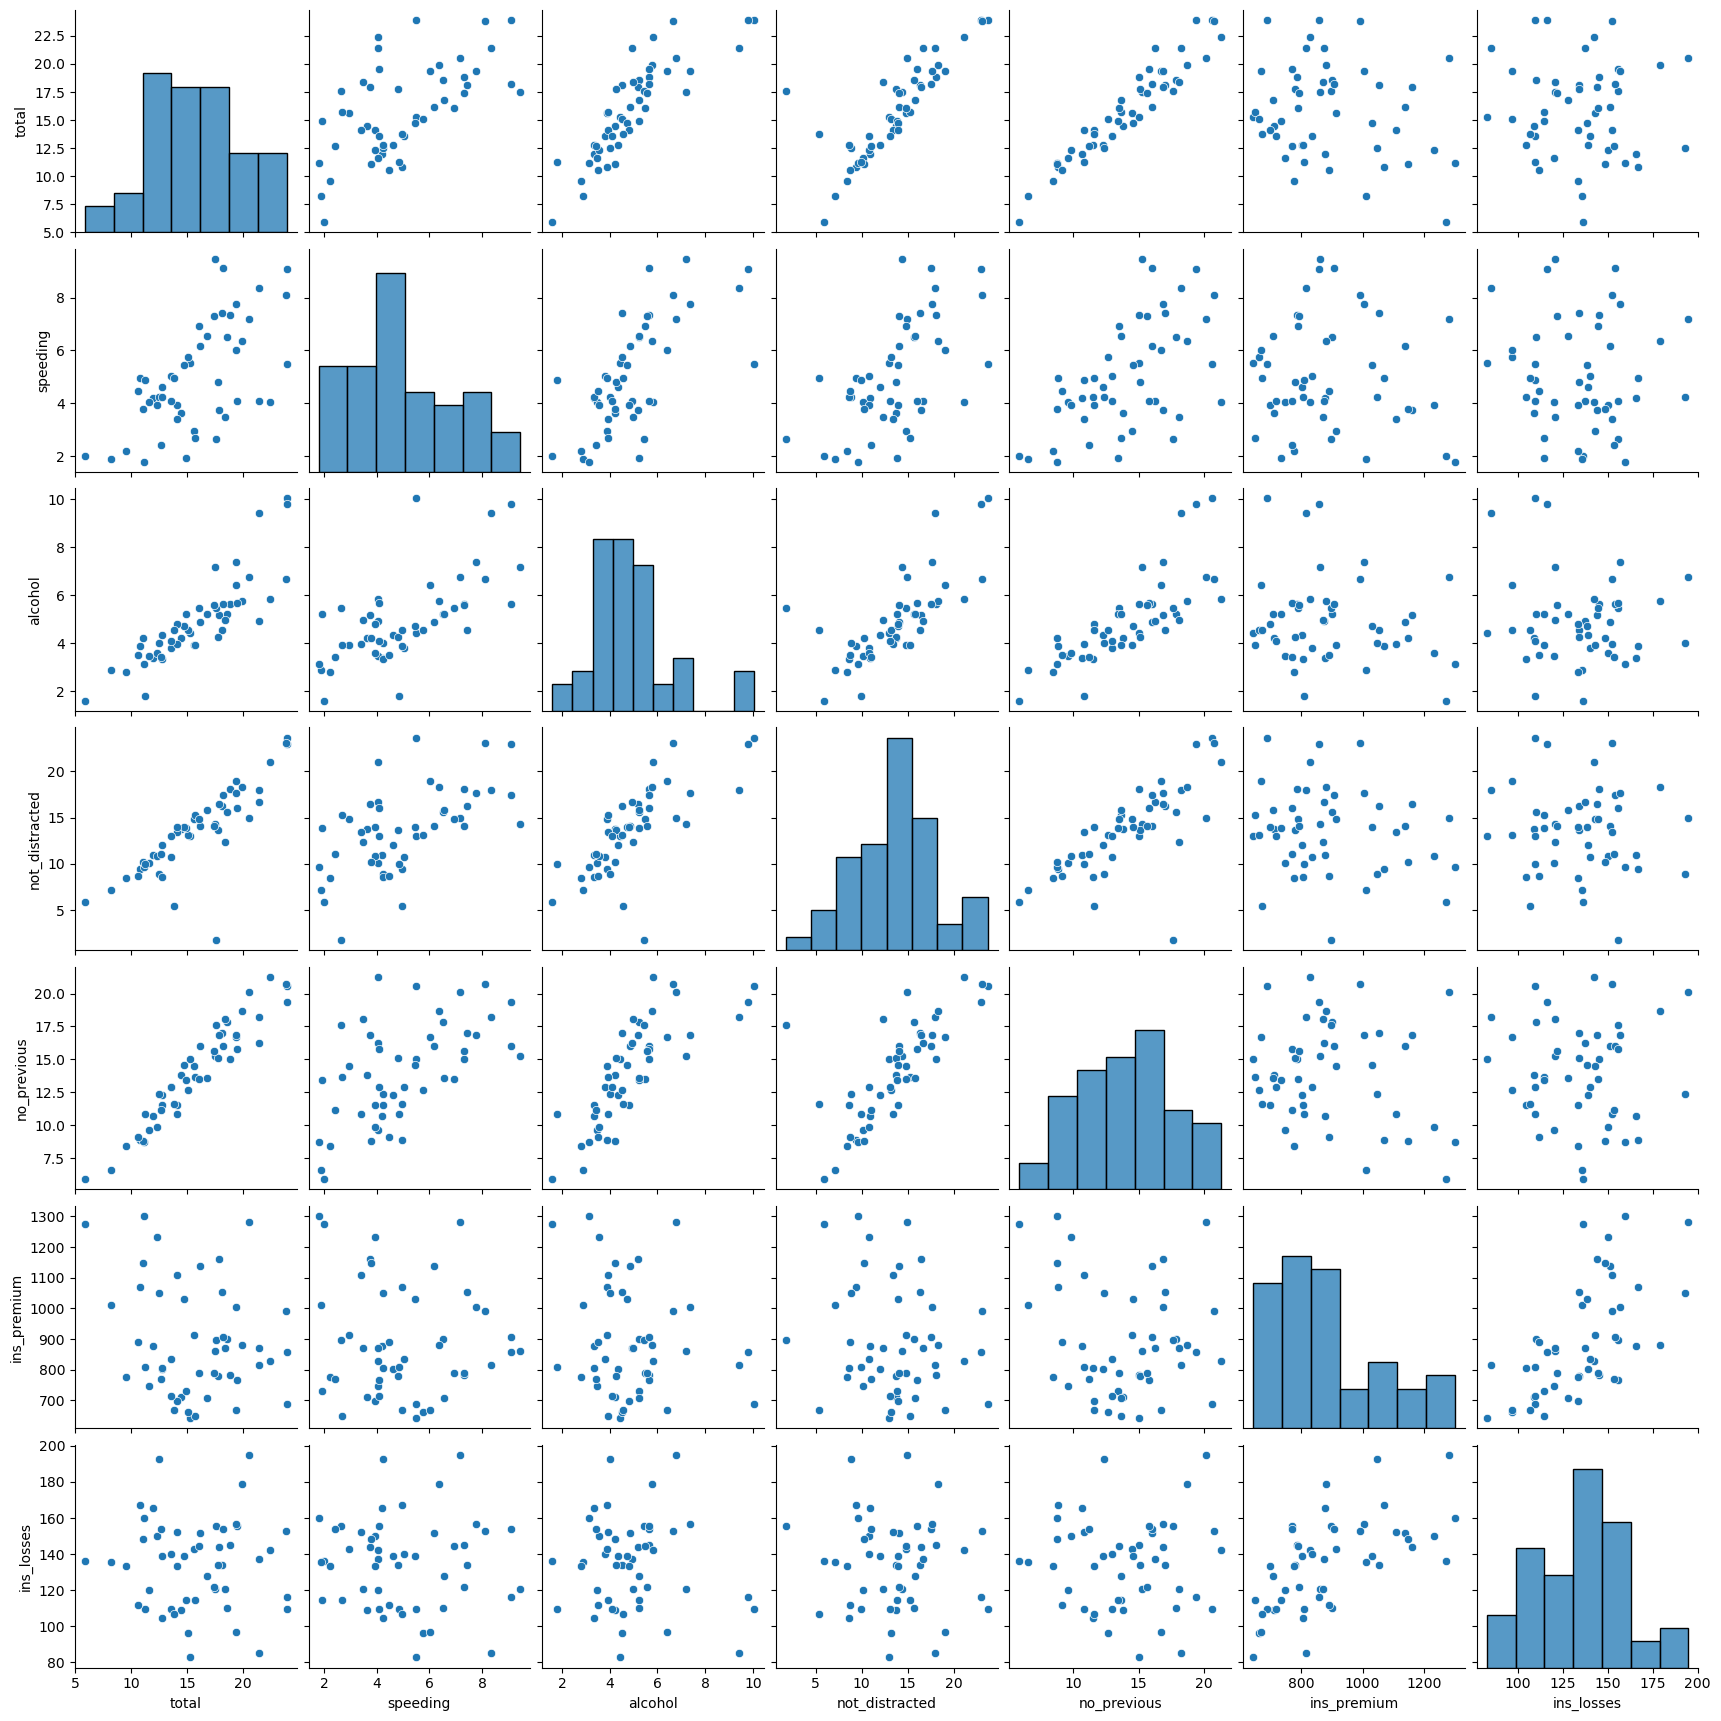

In [29]:
sns.pairplot(data=crashes)